<a href="https://colab.research.google.com/github/amelliaaas/PraktikumML_282-305/blob/main/Tugaspraktikum2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Load Data

In [ ]:
!pip install imutils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Covid19-dataset

/content/drive/MyDrive/Covid19-dataset


In [ ]:
import os

base_dir ='/content/drive/MyDrive/Covid19-dataset'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_covid_dir = os.path.join(train_dir, 'Covid')
train_normal_dir = os.path.join(train_dir, 'Normal')
train_viral_pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')

test_covid_dir = os.path.join(test_dir, 'Covid')
test_normal_dir = os.path.join(test_dir, 'Normal')
test_viral_pneumonia_dir = os.path.join(test_dir, 'Viral Pneumonia')

In [ ]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_covid_dir)[:10])
print(os.listdir(train_normal_dir)[:10])
print(os.listdir(train_viral_pneumonia_dir)[:10])

['012.jpeg', '019.png', '010.png', '02.jpeg', '01.jpeg', '015.jpg', '032.jpeg', '03.jpeg', '042.jpeg', '031.jpeg']
['010.jpeg', '012.jpeg', '017.jpeg', '01.jpeg', '018.jpeg', '016.jpeg', '014.jpeg', '015.jpeg', '019.jpeg', '011.jpeg']
['018.jpeg', '041.jpeg', '020.jpeg', '011.jpeg', '048.jpeg', '045.jpeg', '037.jpeg', '019.jpeg', '025.jpeg', '042.jpeg']


In [ ]:
# Cek jumlah data train dan data validation
#2. Menampilkan hasil jumlah pembagian
import os
import shutil

testcovid = "/content/drive/MyDrive/Covid19-dataset/test/Covid"
testnormal = "/content/drive/MyDrive/Covid19-dataset/test/Normal"
testviralpneumonia = "/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia"
traincovid = "/content/drive/MyDrive/Covid19-dataset/train/Covid"
trainnormal = "/content/drive/MyDrive/Covid19-dataset/train/Normal"
trainviralpneumonia = "/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia"

test_c = os.listdir(testcovid)
test_n = os.listdir(testnormal)
test_v = os.listdir(testviralpneumonia)
train_c = os.listdir(traincovid)
train_n = os.listdir(trainnormal)
train_v = os.listdir(trainviralpneumonia)

print ("Jumlah Train Covid :"+ str(len(train_c)))
print ("Jumlah Train Normal :"+ str(len(train_n)))
print ("Jumlah Train Viral Pneumonia :"+ str(len(train_v)))
print ("Jumlah Test Covid :"+ str(len(test_c)))
print ("Jumlah Test Normal :"+ str(len(test_n)))
print ("Jumlah Test Viral Pneumonia :"+ str(len(test_v)))

Jumlah Train Covid :111
Jumlah Train Normal :70
Jumlah Train Viral Pneumonia :70
Jumlah Test Covid :35
Jumlah Test Normal :21
Jumlah Test Viral Pneumonia :20


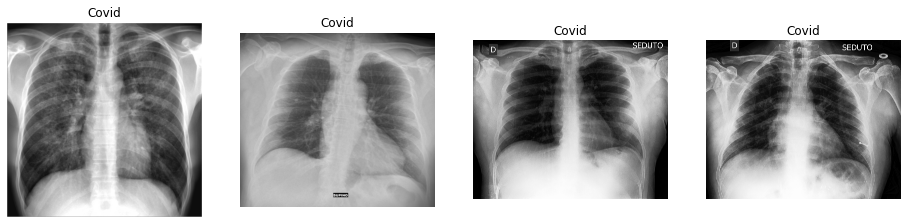

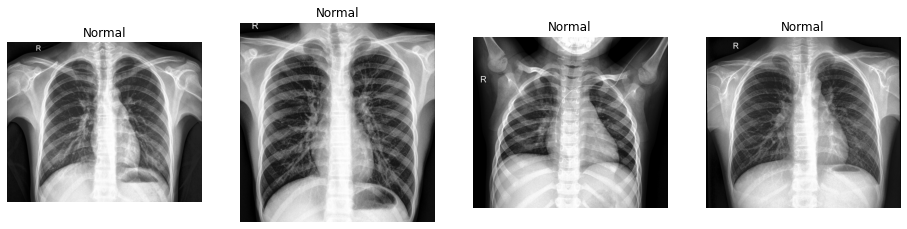

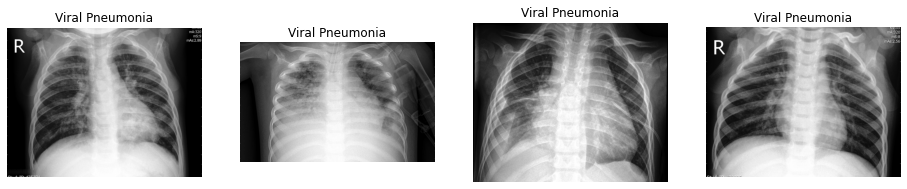

In [ ]:
#3.Menampilkan sample sebagian gambar dari kelas yang berbeda dengan ukuran 2 baris x 4 kolom

import matplotlib.pyplot as plt
import matplotlib.image as mping

traincovid_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/train/Covid')
trainnormal_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/train/Normal')
trainviralpneumonia_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia')

covid_image = os.listdir(traincovid_dir)
normal_image = os.listdir(trainnormal_dir)
viralpneumonia_image = os.listdir(trainviralpneumonia_dir)

fname1 = [os.path.join(traincovid_dir,fname)
        for fname in covid_image[1:5]]

fname2 = [os.path.join(trainnormal_dir,fname)
        for fname in normal_image[1:5]]

fname3 = [os.path.join(trainviralpneumonia_dir,fname)
        for fname in viralpneumonia_image[1:5]]

ncolu = 4
nrow = 3
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*3)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Covid')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 3
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*3)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Normal')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 3
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*3)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Viral Pneumonia')
    plt.imshow(img)
    
plt.show()

### 2. Preprocessing

In [ ]:
# 1. Gather data training dan testing dengan ukuran gambar 250x250 (total 5 point)

import os 
import cv2
import numpy as np

# gather data train
train_data = []
train_label = []

train_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/train')
for r, d, f in os.walk(train_dir):
  for file in f :
    # if ".jpeg" + ".png" + ".jpg" in file :
      imagepath = os.path.join(r, file)
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (250,250))
      train_data.append(image)
      label = imagepath.split(os.path.sep)[-2]
      train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

# gather data testing
val_data = []
val_label = []

test_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/test')
for r, d, f in os.walk(test_dir):
  for file in f :
    # if ".jpeg" + ".png" + ".jpg" in file :
      imagepath = os.path.join(r, file)
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (250,250))
      val_data.append(image)
      label = imagepath.split(os.path.sep)[-2]
      val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
#shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (251, 250, 250, 3)
Train Label =  (251,)
Validation Data =  (76, 250, 250, 3)
Validation Label =  (76,)


In [ ]:
#2. Normalisasi dataset
print("Data sebelum di-normalisasi : ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0

print("Data sesudah di-normalisasi : ", x_train[0][0][0])

Data sebelum di-normalisasi :  [26 26 26]
Data sesudah di-normalisasi :  [0.10196079 0.10196079 0.10196079]


In [ ]:
#3. Membuat Label Encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[3:250])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[3:250])

Label sebelum di-encoder  ['Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral

### 3. Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GlobalMaxPool2D, Conv2D, MaxPool2D, Flatten

In [ ]:
# 1. Membuat & menampilkan scenario Pertama
# Membuat model training dengan CNN, 
# diantara layer convolution buatlah pooling menggunakan metode maxpooling kemudian 
# diakhir layer CNN tambahkan globalmaxpooling sebelum melakukan flatten (model1)

# Feature Extraction Layer
model1 = Sequential()
model1.add(InputLayer(input_shape = [250,250,3]))
model1.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(GlobalMaxPool2D())
model1.add(Flatten())

# Fully Connected Layer
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

# Summary Scenario Pertama
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#3. Training model scenario Pertama
Training_model1 = model1.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
8/8 [==============================] - 16s 2s/step - loss: 0.4363 - acc: 0.2789 - val_loss: 0.5074 - val_acc: 0.2763
Epoch 2/100
8/8 [==============================] - 15s 2s/step - loss: 0.3360 - acc: 0.2789 - val_loss: 0.4189 - val_acc: 0.2763
Epoch 3/100
8/8 [==============================] - 15s 2s/step - loss: 0.2115 - acc: 0.2789 - val_loss: 0.3377 - val_acc: 0.2763
Epoch 4/100
8/8 [==============================] - 15s 2s/step - loss: 0.0542 - acc: 0.2789 - val_loss: 0.2313 - val_acc: 0.2763
Epoch 5/100
8/8 [==============================] - 15s 2s/step - loss: -0.1816 - acc: 0.2789 - val_loss: 0.1625 - val_acc: 0.2763
Epoch 6/100
8/8 [==============================] - 15s 2s/step - loss: -0.8464 - acc: 0.3586 - val_loss: -0.1872 - val_acc: 0.3289
Epoch 7/100
8/8 [==============================] - 15s 2s/step - loss: -2.0807 - acc: 0.3586 - val_loss: -0.5903 - val_acc: 0.4342
Epoch 8/100
8/8 [==============================] - 15s 2s/step - loss: -5.0790 - acc: 0.4263

### 4. Result

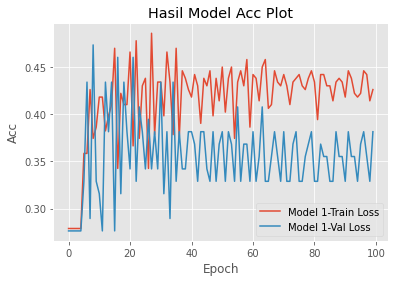

In [ ]:
# 1. Plot hasil akurasi model menjadi 1 canvas

%matplotlib inline
import matplotlib.pyplot as plt


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,100), Training_model1.history["acc"], label="Model 1-Train Loss")
plt.plot(np.arange(0,100), Training_model1.history["val_acc"], label="Model 1-Val Loss")
plt.title("Hasil Model Acc Plot")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
# 3. Klasifikasi report dari Model 1

from sklearn.metrics import classification_report

pred = model1.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))


              precision    recall  f1-score   support

           0       1.00      0.23      0.37        35
           1       0.31      1.00      0.47        21
           2       0.00      0.00      0.00        20

    accuracy                           0.38        76
   macro avg       0.44      0.41      0.28        76
weighted avg       0.55      0.38      0.30        76



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
